# Solution

# 1.	Import the necessary libraries and read the data.

In [485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [486]:
data = pd.read_csv("C:\\Users\\Hemant\\Desktop\\Mini Project\\EDA_mini_project\\fifa.csv")

In [487]:
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [488]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null

In [489]:
data.shape

(18207, 60)

In [490]:
data.size

1092420

In [491]:
drop_column = data.loc[:,['Flag','Photo','Club Logo','Jersey Number']]

In [492]:
drop_column.head()

,Flag,Photo,Club Logo,Jersey Number
0,https://cdn.sofifa.org/flags/52.png,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/teams/2/light/241.png,10.0
1,https://cdn.sofifa.org/flags/38.png,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/teams/2/light/45.png,7.0
2,https://cdn.sofifa.org/flags/54.png,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/teams/2/light/73.png,10.0
3,https://cdn.sofifa.org/flags/45.png,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/teams/2/light/11.png,1.0
4,https://cdn.sofifa.org/flags/7.png,https://cdn.sofifa.org/players/4/19/192985.png,https://cdn.sofifa.org/teams/2/light/10.png,7.0


# Dropping  unecessary columns

In [493]:
data.drop(['Flag','Photo','Club Logo','Jersey Number'],axis =1,inplace = True)

In [494]:
data.shape

(18207, 56)

#   3.	The following columns need to be converted for further analysis:

In [495]:
value =data['Value']
value

0        €110.5M
1           €77M
2        €118.5M
3           €72M
4          €102M
          ...   
18202       €60K
18203       €60K
18204       €60K
18205       €60K
18206       €60K
Name: Value, Length: 18207, dtype: object

In [496]:
value = value.str.replace('€','')
value

0        110.5M
1           77M
2        118.5M
3           72M
4          102M
          ...  
18202       60K
18203       60K
18204       60K
18205       60K
18206       60K
Name: Value, Length: 18207, dtype: object

In [497]:
value=value.str.replace('M','0000000')

In [498]:
value=value.str.replace('K','000')

In [499]:
value=value.str.replace('.','')

In [500]:
value

0        11050000000
1          770000000
2        11850000000
3          720000000
4         1020000000
            ...     
18202          60000
18203          60000
18204          60000
18205          60000
18206          60000
Name: Value, Length: 18207, dtype: object

In [501]:
value=list(np.float_(value))

In [502]:
value

[11050000000.0,
 770000000.0,
 11850000000.0,
 720000000.0,
 1020000000.0,
 930000000.0,
 670000000.0,
 800000000.0,
 510000000.0,
 680000000.0,
 770000000.0,
 7650000000.0,
 440000000.0,
 600000000.0,
 630000000.0,
 890000000.0,
 8350000000.0,
 780000000.0,
 580000000.0,
 5350000000.0,
 5150000000.0,
 600000000.0,
 380000000.0,
 6450000000.0,
 270000000.0,
 810000000.0,
 6950000000.0,
 5950000000.0,
 6950000000.0,
 620000000.0,
 7350000000.0,
 7350000000.0,
 6950000000.0,
 590000000.0,
 460000000.0,
 430000000.0,
 600000000.0,
 360000000.0,
 570000000.0,
 240000000.0,
 300000000.0,
 40000000.0,
 570000000.0,
 6450000000.0,
 510000000.0,
 640000000.0,
 3050000000.0,
 6250000000.0,
 520000000.0,
 380000000.0,
 450000000.0,
 340000000.0,
 4650000000.0,
 4650000000.0,
 340000000.0,
 610000000.0,
 5950000000.0,
 4150000000.0,
 520000000.0,
 4450000000.0,
 5650000000.0,
 530000000.0,
 500000000.0,
 550000000.0,
 3650000000.0,
 4650000000.0,
 450000000.0,
 4550000000.0,
 4350000000.0,
 35000

In [503]:
data['Value']=value

In [504]:
data['Value']

0        1.105000e+10
1        7.700000e+08
2        1.185000e+10
3        7.200000e+08
4        1.020000e+09
             ...     
18202    6.000000e+04
18203    6.000000e+04
18204    6.000000e+04
18205    6.000000e+04
18206    6.000000e+04
Name: Value, Length: 18207, dtype: float64

In [505]:
#data.Wage
wage =data['Wage']
wage = wage.str.replace('€','')
wage=wage.str.replace('M','0000000')
wage=wage.str.replace('K','000')
wage=wage.str.replace('.','')

In [506]:
wage=list(np.float_(wage))

In [507]:
data['Wage']=wage

In [508]:
data['Wage']

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 18207, dtype: float64

In [509]:
data['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2         Aug 3, 2017
3         Jul 1, 2011
4        Aug 30, 2015
             ...     
18202     May 3, 2017
18203    Mar 19, 2018
18204     Jul 1, 2017
18205    Apr 24, 2018
18206    Oct 30, 2018
Name: Joined, Length: 18207, dtype: object

In [510]:
joined = data['Joined'].str.split(' ',expand = True)[2]

In [511]:
joined

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: 2, Length: 18207, dtype: object

In [512]:
joined.describe()

count     16654
unique       22
top        2018
freq       6569
Name: 2, dtype: object

In [513]:
data['Joined'] = list(np.float_(joined))

In [514]:
data['Joined'].isnull().sum()

1553

In [515]:
data['Joined'].describe()

count    16654.000000
mean      2016.459829
std          2.105924
min       1991.000000
25%       2016.000000
50%       2017.000000
75%       2018.000000
max       2018.000000
Name: Joined, dtype: float64

In [516]:
joined.fillna(value='2018',inplace=True)

In [517]:
#data['year']= pd.DatetimeIndex(data['Joined']).year
#data['Joined']=data['year']

In [518]:
data['Joined']=list(np.int_(joined))

In [519]:
data['Contract Valid Until']

0        2021
1        2022
2        2022
3        2020
4        2023
         ... 
18202    2019
18203    2020
18204    2021
18205    2019
18206    2019
Name: Contract Valid Until, Length: 18207, dtype: object

In [520]:
data['Contract Valid Until'].isnull().sum()

289

In [521]:
data['Contract Valid Until'].describe()

count     17918
unique       36
top        2019
freq       4819
Name: Contract Valid Until, dtype: object

In [522]:
data['Contract Valid Until'].fillna(value ='2019',inplace = True) 

In [523]:
data['Contract Valid Until'].isnull().sum()

0

In [524]:
### data['Contract Valid Until'].unique()

In [525]:
valid=data['Contract Valid Until']

In [526]:
valid=valid.replace(to_replace=['May 31, 2019', 'Dec 31, 2019', 'Jan 1, 2019', 'Jun 1, 2019',
       'Jan 4, 2019', 'Jan 31, 2019', 'Jan 7, 2019', 'Jan 2, 2019',
       'Jan 6, 2019', 'Oct 14, 2019', 'Jan 3, 2019', 'May 4, 2019',
       'Jan 12, 2019', 'Jan 25, 2019', 'Jan 18, 2019', 'Dec 1, 2019','Jan 5, 2019', 'Jan 15, 2019',
       'Jan 30, 2019', 'Jan 11, 2019', 'Jan 20, 2019'],value='2019')

In [527]:
valid.unique()

array(['2021', '2022', '2020', '2023', '2019', '2024', 'Jun 30, 2019',
       '2025', '2026', 'Dec 31, 2018', '2018', 'May 31, 2020',
       'Jun 30, 2020', 'Nov 30, 2018', 'Feb 27, 2020'], dtype=object)

In [528]:
valid=valid.replace(to_replace=['Dec 31, 2018', 'Nov 30, 2018',],value='2018')

In [529]:
valid=valid.replace(to_replace=['May 31, 2020', 'Jun 30, 2020','Feb 27, 2020'],value='2020')

In [530]:
valid=valid.replace(to_replace=['Jun 30, 2019'],value='2019')

In [531]:
valid.isnull().sum()

0

In [532]:
valid = list(np.int_(valid))

In [533]:
data['Contract Valid Until']=valid

In [534]:
data['Contract Valid Until']

0        2021
1        2022
2        2022
3        2020
4        2023
         ... 
18202    2019
18203    2020
18204    2021
18205    2019
18206    2019
Name: Contract Valid Until, Length: 18207, dtype: int64

In [535]:
data['Height']

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18207, dtype: object

In [536]:
data.Height.isnull().sum()

48

In [537]:
Height = data['Height'].str.replace("'",'.')

In [538]:
Height= list(np.float_(Height))

In [539]:
data['Height'] = Height

In [540]:
data['Height'].isnull().sum()

48

In [541]:
data['Height'].fillna(value = data.Height.mean(),inplace = True)

In [542]:
data['Height'].isnull().sum()

0

In [543]:
data['Height']

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: float64

In [544]:
data['Weight'].isnull().sum()

48

In [545]:
weight= data['Weight']

In [546]:
weight=weight.str.replace('lbs','')

In [547]:
weight= list(np.float_(weight))

In [548]:
data['Weight']= weight

In [549]:
data['Weight'] =data['Weight'].fillna(value = data['Weight'].mean())

In [550]:
data['Weight'].isnull().sum()

0

In [551]:
RC =data['Release Clause']
RC = RC.str.replace('€','')
RC=RC.str.replace('M','0000000')
RC=RC.str.replace('K','000')
RC=RC.str.replace('.','')

In [552]:
RC = list(np.float_(RC))

In [553]:
data['Release Clause'] = RC

In [554]:
data['Release Clause'].isnull().sum()

1564

In [555]:
data.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Joined                          0
Loaned From                 16943
Contract Valid Until            0
Height                          0
Weight                          0
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy                     48
LongPassing   

# 1.	Plot the distribution of Overall rating for all players. 

Text(0.5, 1.0, 'Plot for overall ratings')

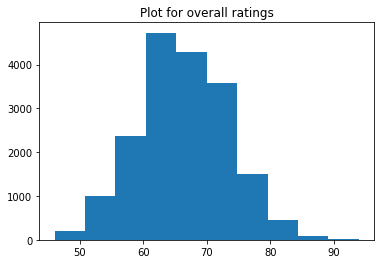

In [556]:
plt.hist(data.Overall)
plt.title("Plot for overall ratings")

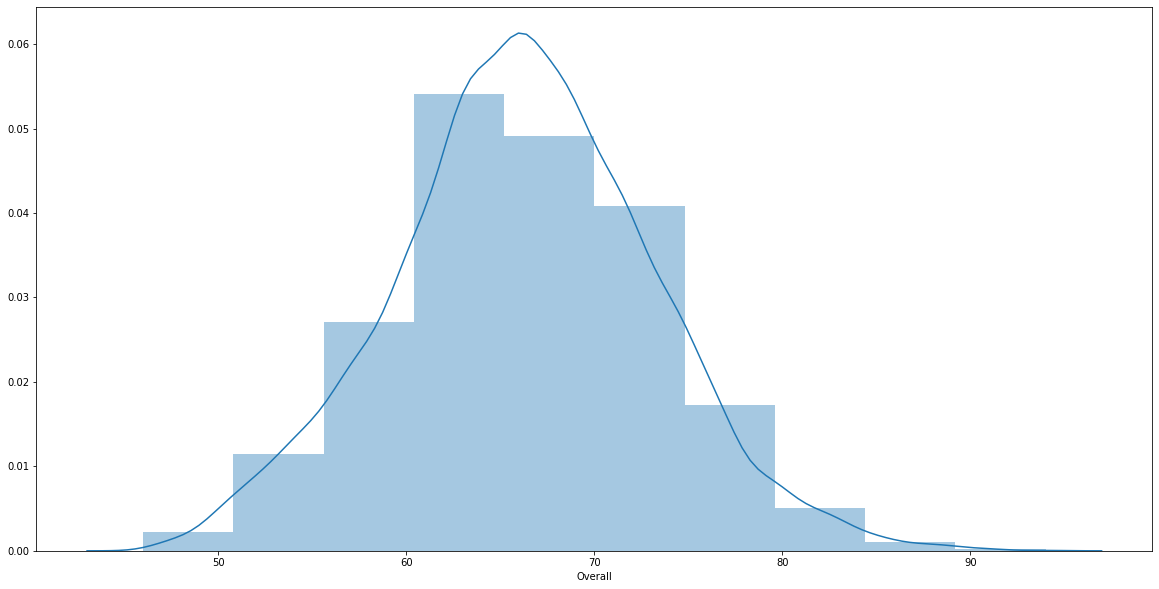

In [557]:
plt.figure(figsize=(20,10))
sns.distplot(data.Overall,bins =10)

#  2.	Generate pair plots for the following variables:
 # Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


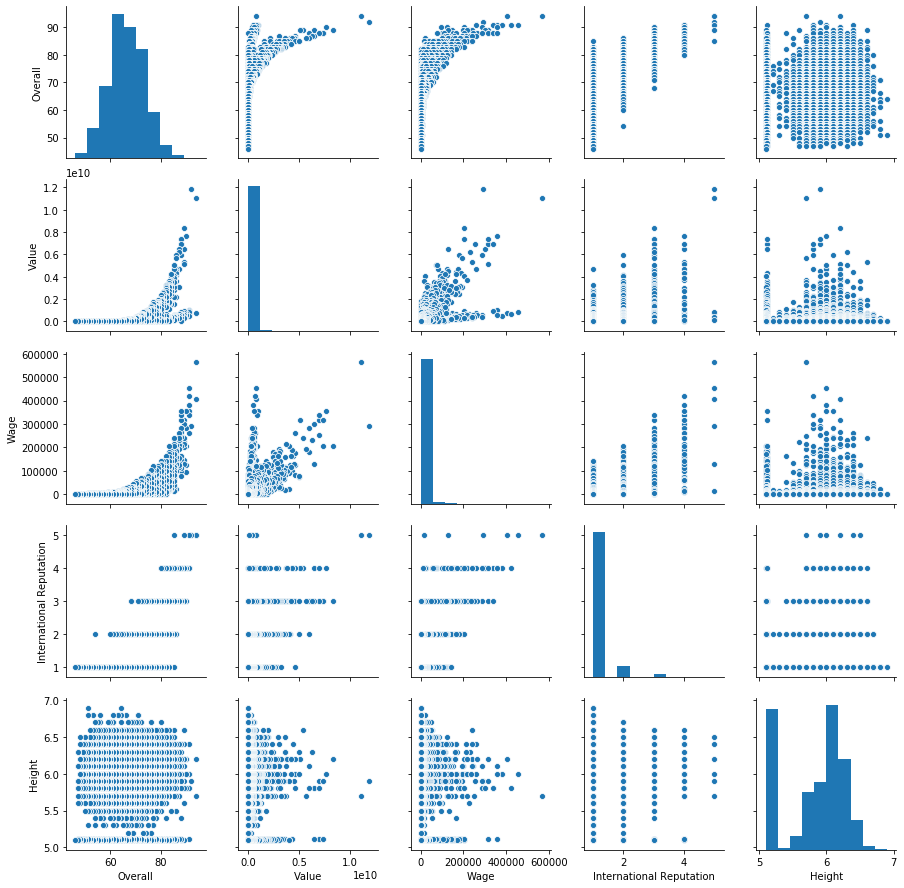

In [558]:
column= ['Overall', 'Value','Wage','International Reputation','Height']
sns.pairplot(data[column])

# 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [559]:
top = data[(data['Contract Valid Until'] ==2020)].sort_values(by ='Overall' ,ascending = False).head(20)
top

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,7.200000e+08,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1.386000e+10
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,6.700000e+08,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,1.374000e+10
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,5.100000e+08,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,1.046000e+10
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,9.300000e+08,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,1.721000e+10
13,168542,David Silva,32,Spain,90,90,Manchester City,6.000000e+08,285000.0,Left,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,1.110000e+09
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,6.000000e+08,200000.0,Right,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,1.110000e+09
24,138956,G. Chiellini,33,Italy,89,89,Juventus,2.700000e+08,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,4.460000e+09
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,7.350000e+09,205000.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,1.415000e+10
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,2.400000e+08,165000.0,Right,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,4.440000e+09
50,175943,D. Mertens,31,Belgium,87,87,Napoli,4.500000e+08,135000.0,Right,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,7.650000e+09


# a)	What would the average wage for this set of players be?

In [560]:
top.Wage.mean()

205450.0

#  b)	What is the average age?

In [561]:
top.Age.mean()

30.65

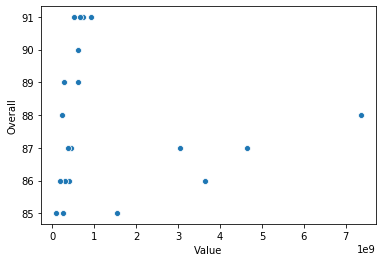

In [562]:
sns.scatterplot(x= top['Value'],y=top['Overall'])

#  c)	Is there a correlation between the Overall rating and Value for these players?



In [563]:
np.corrcoef(top.Overall,top.Value)

array([[ 1.        , -0.07750669],
       [-0.07750669,  1.        ]])

In [564]:
top['Value'].corr(top['Overall'])

-0.07750669365084294

There is no significant correlation between the Overall rating and Value of these Players

#  4.	Generate tables containing the top 5 players by Overall rating for each unique position

In [565]:
position =data['Position'].unique()

In [566]:
position

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [567]:
appended_data = []
for i in position:
    a=data[data['Position']==i].sort_values(by ='Overall',ascending=False)[['Name','Wage','Overall']].head()
    print("For {} position top 5 players by Overall rating".format(i),"\n",a)
    print("\t")
    appended_data.append(a['Name'])
appended_data = pd.concat(appended_data)

For RF position top 5 players by Overall rating 
              Name      Wage  Overall
0        L. Messi  565000.0       94
50     D. Mertens  135000.0       87
528     D. Valeri   12000.0       80
890   L. Podolski   11000.0       78
1774     C. Ciano   17000.0       75
	
For ST position top 5 players by Overall rating 
                  Name      Wage  Overall
1   Cristiano Ronaldo  405000.0       94
10     R. Lewandowski  205000.0       90
16            H. Kane  205000.0       89
23          S. Agüero  300000.0       89
36            G. Bale  355000.0       88
	
For LW position top 5 players by Overall rating 
           Name      Wage  Overall
2    Neymar Jr  290000.0       92
30        Isco  315000.0       88
32    Coutinho  340000.0       88
29  L. Insigne  165000.0       88
55     L. Sané  195000.0       86
	
For GK position top 5 players by Overall rating 
              Name      Wage  Overall
3          De Gea  260000.0       91
9        J. Oblak   94000.0       90
18  M. ter 

#  a)	Are there any players appearing in more than one Table. Please point out such players.


In [568]:
print(type(appended_data))
appended_data[appended_data.duplicated()]

<class 'pandas.core.series.Series'>


Series([], Name: Name, dtype: object)

# ANS- No there are not any players appearing in more than one table

# b)	What is the average wage one can expect to pay for the top 5 in every position?

In [569]:
for i in position:
    a=data[data['Position']==i].sort_values(by ='Overall',ascending=False).head()
    print("The Average wage for {} position ".format(i),a['Wage'].mean())
    print("\t")

The Average wage for RF position  148000.0
	
The Average wage for ST position  294000.0
	
The Average wage for LW position  261000.0
	
The Average wage for GK position  192800.0
	
The Average wage for RCM position  240800.0
	
The Average wage for LF position  121200.0
	
The Average wage for RS position  132200.0
	
The Average wage for RCB position  231000.0
	
The Average wage for LCM position  184400.0
	
The Average wage for CB position  139600.0
	
The Average wage for LDM position  126600.0
	
The Average wage for CAM position  174000.0
	
The Average wage for CDM position  217000.0
	
The Average wage for LS position  130200.0
	
The Average wage for LCB position  162000.0
	
The Average wage for RM position  131400.0
	
The Average wage for LAM position  81600.0
	
The Average wage for LM position  164600.0
	
The Average wage for LB position  177200.0
	
The Average wage for RDM position  105000.0
	
The Average wage for RW position  202000.0
	
The Average wage for CM position  130600.0
	
Th